Link to website: https://danellsworth.github.io/

## Milestone 1 - Financial Sentiment Analysis

Dan Ellsworth and Alden Pratt

> For our Final Tutorial Project, we will be examining the effectiveness of using sentiment analysis based on Twitter posts relating to publicly traded companies as a leading or lagging indicator of the stock price.  Fluctuations in stock prices can be largely attributed to changes in the attitude of its buyers and holders. As such, platforms in which people are allowed to freely voice their attitude toward a company, such as Twitter, can be influential for a broad audience of traders.  If a particular authority voices optimism regarding the future of a company’s stock, and enough people are convinced into buying, its stock price will increase to meet the increased demand.  Conversely, authority figures voicing pessimism generally results in a lower price.  We will be using company sentiment data from Twitter to see if there is a significant correlation between community sentiment and the change in the stock price. 
> Through studying this issue, several questions arise.  We are curious to know if sentiment generally follows stock prices or if stock prices follow sentiment. In other words, should we be looking at sentiment as a leading or lagging indicator of stock prices?  Who is influential?  Are some companies intrinsically more or less resistant to changes in sentiment?  Can our findings be used in developing a complete and profitable trading strategy?  
    
Below are a couple of data sets containing sentiment analysis for various companies:
   >  https://www.kaggle.com/vivekrathi055/sentiment-analysis-on-financial-tweets 
   >  https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
    
> To determine the effects that Twitter posts have on stock prices, we plan on combining one of these data sets with historical stock price data that can be pulled from Yahoo Finance.  Yahoo Finance provides data for stock price fluctuations for every company and every day.  We expect that the changes in public sentiment over time will somewhat mirror the changes in the stock price as provided by Yahoo Finance.    



## Collaboration Plan

> We have and will continue to meet via Zoom biweekly, and possibly more frequently as needed to satisfy approaching deadlines. We acknowledge that this will likely change depending on what phase of the project we are in.

### Technologies:
- Github to coordinate code
- Shared Google Docs for write ups
- Twitter API
- RapidAPI (For Yahoo Finance data)







### Setup up and import necessary libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import yfinance as yf
%matplotlib inline

### Extracting Data

In [51]:
# read the data from csv files
StockDF = pd.read_csv('TwitterStockData.csv')
SentimentDF = pd.read_csv('tweet_sentiment.csv')

# declare start and end date for financial data
start = datetime.datetime(2018,7,17)
end = datetime.datetime(2018,10,25)

# read S&P500 data for declared dates
SPY500 = web.DataReader('SPY', 'yahoo', start, end)
BTC = web.DataReader('BTC-USD', 'yahoo', start, end)

StockDF.head()


,text,timestamp,source,symbols,company_names,url,verified
0,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE
1,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE
2,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE
3,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE
4,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE


In [52]:
SentimentDF.head()

,cleaned_tweets,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


In [53]:
SPY500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-17,280.910004,278.410004,278.470001,280.470001,52315500.0,268.572174
2018-07-18,281.179993,280.059998,280.559998,281.059998,44593500.0,269.137207
2018-07-19,280.739990,279.459991,280.309998,280.000000,61412100.0,268.122101
2018-07-20,280.480011,279.500000,279.769989,279.679993,82337700.0,267.815704
2018-07-23,280.429993,279.059998,279.450012,280.200012,47047600.0,268.313629


## Tidying Data

> The data we have used here was conveniently formatted in a way that did not require much altering. The data from Kaggle contained two separate CSV files. One for tweet information, and another for sentiment scores for cleaned tweets (a cleaned tweet omits unimportant words). Since sentiment scores are different from tweet information, this is exactly how we hoped the tables would be formatted. We can combine the two tables based on the indexes, as we do below:

In [54]:
# merge the two data frames (tweet info and tweet sentiment) - inner join based on index
StockSentimentDF = StockDF.merge(SentimentDF, how='inner', left_index = True, right_index=True)


> A few columns are added to our dataframe that will be useful when doing our exploratory data analysis.  These useful columns are the tweet's date as a datetime type, how much the stock changed on that day, how much the stock changed on the next day, and the stock's sector.  This information is gathered using the Python Yahoo! Finance library.  In this example, we only consider the first 100 entities because the calls to the Yahoo! Finance library take a considerable amount of time.  However, the data ought to be run with the full data set in the first deliverable.   

In [55]:
StockSentimentDF = StockSentimentDF.head(100)

def getStockData(symbol, date):
        if not "-" in symbol:
            t = yf.download(symbol, start=date, end=date + datetime.timedelta(days=1))
            if t.size > 0:
                perc_change = (t["Open"].iloc[0] - t["Close"].iloc[0] ) / t["Open"].iloc[0]  * 100
                return perc_change
            return None
        else:
            return None
        
def getSector(symbol):
    try:
        ticker = yf.Ticker(symbol)
        c = ticker.info['sector']
        return c
    except:
        return None
    
def tweetDate(timestamp):
    t = datetime.datetime.strptime(timestamp, "%a %b %d %H:%M:%S +0000 %Y")
    return t.date()

StockSentimentDF["date"] = StockSentimentDF.apply(lambda row: tweetDate(row["timestamp"]), axis = 1)

StockSentimentDF["perc_change"] = StockSentimentDF.apply(lambda row: getStockData(row["symbols"], row["date"]), axis = 1)
StockSentimentDF["NextDay_perc_change"] = StockSentimentDF.apply(lambda row: getStockData(row["symbols"], row["date"] + datetime.timedelta(days=1)), axis = 1)
StockSentimentDF["sector"] = StockSentimentDF.apply(lambda row: getSector(row["symbols"]), axis = 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HRS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TWX: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 

## Exploratory Data Analysis

### Tweet Dates
> First, we wanted to know the date distribution of our tweets.  What timeframe does our data focus on? To do this, we created a density plot.  Using code from [here](https://stackoverflow.com/questions/31348737/how-to-plot-kernel-density-plot-of-dates-in-pandas), we found that most of our data are from the summer of 2018.

[Text(736650.0, 0, '2017-11-17'),
 Text(736750.0, 0, '2018-02-25'),
 Text(736850.0, 0, '2018-06-05'),
 Text(736950.0, 0, '2018-09-13')]

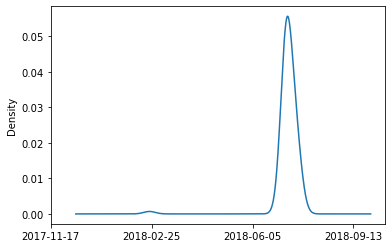

In [56]:
a = StockSentimentDF.groupby(['date']).count()
StockSentimentDF['ordinal'] = [x.toordinal() for x in StockSentimentDF["date"]]

ax = StockSentimentDF['ordinal'].plot(kind='kde')
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)

### Stock Sectors
> Next, we looked at the sector of stocks mentioned in our twitter data.  Our distribution contains several different sectors, which means that users on twitter do not only talk about one or two types of stocks, but rather at interested in a very diverse set of stocks.

<AxesSubplot:xlabel='sector'>

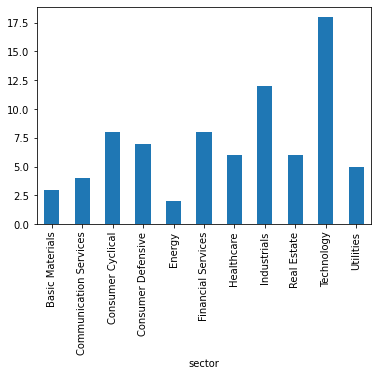

In [57]:
e = StockSentimentDF.groupby(['sector']).count()
e["text"].plot.bar()

### Number of stock tweets per day
> Next, we were interested in the number of tweets any given stock gets in one day.  Our set is rather limited, and the most popular symbol-date pairings are shown below.  

In [58]:
b = StockSentimentDF.groupby(['symbols', 'date']).count()
b.sort_values("text").tail()

,,text,timestamp,source,company_names,url,verified,cleaned_tweets,sentiment,perc_change,NextDay_perc_change,sector,ordinal
symbols,date,,,,,,,,,,,,
FNSR,2018-07-09,3,3,3,3,3,3,3,3,0,0,0,3
ODP,2018-07-09,3,3,3,3,2,3,3,3,3,3,3,3
DLTR,2018-07-09,4,4,4,4,2,4,4,4,4,4,4,4
JEC,2018-07-09,8,8,8,8,2,8,8,8,0,0,0,8
ARRY,2018-07-09,9,9,9,9,3,9,9,9,0,0,9,9


### Plotting Price Percent Change vs. Average Sentiment

> Here, we take the average sentiment from Twitter regarding a particular stock on a particular date, and plot it against the percent change on that day.  We expect to see a positive correlation between the two because if a stock performs well on a given day, we expect general optimism throughout Tweets on that day. 

Correlation:  -0.1617680688320239


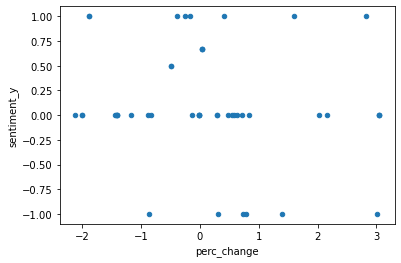

In [59]:
m = StockSentimentDF.groupby(['symbols', 'date']).mean()
t = StockSentimentDF.merge(m, on=["symbols", "perc_change"])
t.plot.scatter(x="perc_change", y="sentiment_y")
print("Correlation: ", t["perc_change"].corr(t["sentiment_y"]))

### Plotting Next-Day Price Percent Change vs. Average Sentiment
> This is similar to the plot above.  However, instead of looking at the price percent change of the day of the tweet, we are now looking at the price percent change of the the next day.  In essence, a positive correlation means that optimistic tweets might have optimistic effects on a stock on the following day.  

Correlation:  0.13078438787074123


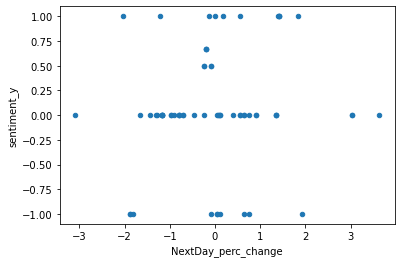

In [60]:
m = StockSentimentDF.groupby(['symbols', 'date']).mean()
t = StockSentimentDF.merge(m, on=["symbols", "NextDay_perc_change"])
t.plot.scatter(x="NextDay_perc_change", y="sentiment_y")
print("Correlation: ", t["NextDay_perc_change"].corr(t["sentiment_y"]))

## Overall Market Sentiment vs Bitcoin Sentiment
Just for fun!

<AxesSubplot:title={'center':'Bitcoin Tweet Sentiment'}>

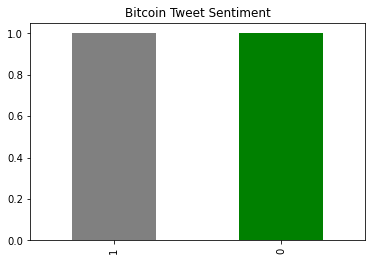

In [61]:
# create a bar graph displaying the number of neutral, positive and negative BTC tweets 
colors = ['grey','g','r']
StockSentimentDF[StockSentimentDF.symbols == 'BTC'].sentiment.value_counts().plot.bar(color = colors, title = "Bitcoin Tweet Sentiment")

<AxesSubplot:title={'center':'Overall Market Tweet Sentiment'}>

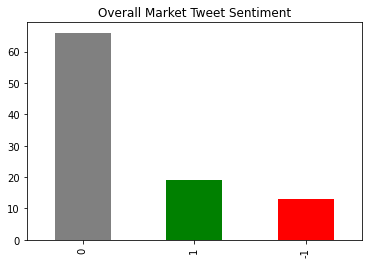

In [62]:
# create a bar graph displaying the number of neutral, positive and negative non-BTC tweets (Overall Market)
StockSentimentDF[StockSentimentDF.symbols != 'BTC'].sentiment.value_counts().plot.bar(color = colors, title = "Overall Market Tweet Sentiment")


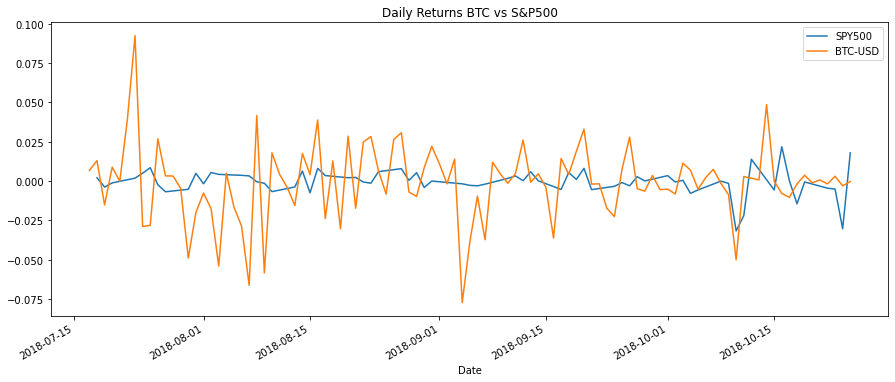

In [63]:
# calculate daily percent change in new column 'returns'
SPY500['returns'] = SPY500['Close'].pct_change(1)
BTC['returns'] = BTC['Close'].pct_change(1)

# plot the daily returns for BTC and SPY500
SPY500['returns'].plot(kind = 'line', title = "Daily Returns BTC vs S&P500", label = 'SPY500', figsize = (15,6))
BTC['returns'].plot(kind = 'line', title = "Daily Returns BTC vs S&P500", label = 'BTC-USD', figsize = (15,6))
plt.legend()
plt.show()

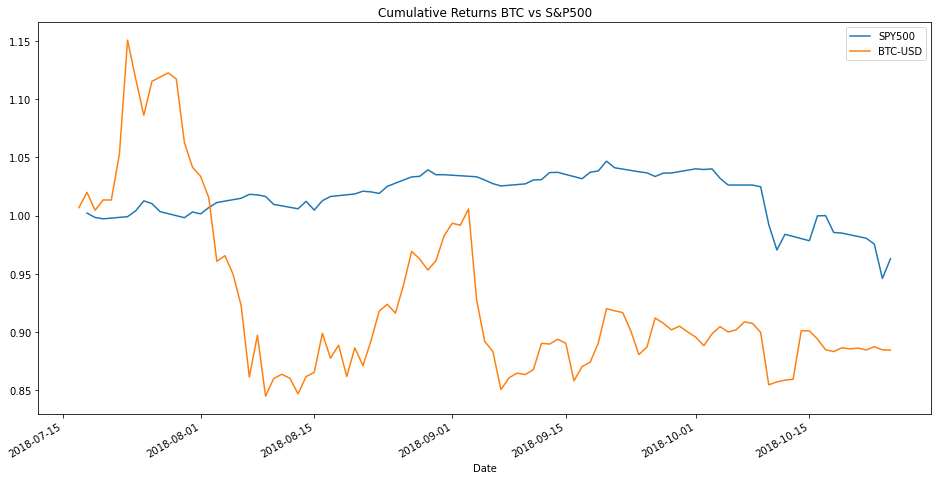

In [64]:
# calculate cumulative returns in a new column ''daily_cumulative_return'
SPY500['daily_cumulative_return'] = ( 1 + SPY500['returns'] ).cumprod()
BTC['daily_cumulative_return'] = ( 1 + BTC['returns'] ).cumprod()

# plot the cumulative returns for BTC and SPY500
SPY500['daily_cumulative_return'].plot(label='SPY500',figsize= (16,8))
BTC['daily_cumulative_return'].plot(label = 'BTC-USD', title = "Cumulative Returns BTC vs S&P500")
plt.legend();
plt.show()
